# Getting started

#### 1. Almost all data* can be represented as a array of numbers
For example :
       -  An image can be represented with a 3dimensional array (RGB) representing the intensities.
       -  An mp3 can be represented as an array of intensities wrt time
       -  An text document can be represented as binary data
    Basically all data can be represented as an array of numbers.

Okay, so we have a large array of numbers, now while working with this large array of numbers, how to efficiently store and use them.
           

#### 2. Existing solutions 
In order to work with a large array of numbers, in python we already have the <code>list</code> right.

In [159]:
million = list(range(0,10**6))
print(million[-1]) 

999999


So the list is a quite easy and fairly simple data strucutre to use. So thats all we need for working with a image or text or audio data right ...? waitup!

In [160]:
import sys
print("Item Count -", len(million),"\n","Ocuupied Size - ",sys.getsizeof(million)," bytes")# thats almost 9 times the size of the data in millionare

Item Count - 1000000 
 Ocuupied Size -  9000112  bytes


Notice that the  soze of holding a basic array of million integers is 9million

Type |  Storage size |  Value range 
------|--------|-------:
 signed char   |  1 byte       |  -128 to 127 
  int          |   2 or 4 bytes|-32,768 to 32,767 or -2,147,483,648 to 2,147,483,647   
  unsigned int | 2 or 4 bytes  | 0 to 65,535 or 0 to 4,294,967,295  

From above table we can see that roughly by storing unsinged int (4bytes) we should be having a maximum of 4*1million bytes of storage used. but this is holding way more than that.

#### 3. Lets look at whats happening here
Since python is dynamically typed, that means that a varible can hold any type of data thoughout its lifetime in a program. unlike statically type data where if a variable is initialized as a int, it should be a int throughout its lifetime.
<code>
    python -- x = 10; x = {};
    c++   --- int a = 10; a =/= {};</code>
    
Lets  look at a python variable and its structure for understanding more about how python does this dynamic typing
https://github.com/certik/python-2.7/blob/c360290c3c9e55fbd79d6ceacdfc7cd4f393c1eb/Doc/c-api/structures.rst



Hence million[0] - 0, is more than just 0 that is stored in memory.
We need a more efficient mechanisim for the storing of this data with the easy of use of lists.

In [161]:
import array
million_array = array.array('i', million)
print("Item Count -", len(million_array),"\n","Ocuupied Size - ",sys.getsizeof(million_array)," bytes")# thats almost 9 times the size of the data in millionare

Item Count - 1000000 
 Ocuupied Size -  4000064  bytes


This is way better than storing it as a list, This is a good solution, but making multidimensional arrays and slicing and dicing would be hard. Theres an alternative, well proven solution <code> numpy </code> 

In [162]:
import numpy as np

million_np_array = np.array(million, dtype="int32")
print("Item Count -", len(million_np_array),"\n","Ocuupied Size - ",sys.getsizeof(million_np_array)," bytes")# thats almost 9 times the size of the data in millionare

Item Count - 1000000 
 Ocuupied Size -  4000096  bytes


#### 4. Introduction to numpy and its modules

In [2]:
import numpy as np

# Creating arrays from existing lists.
items = list(range(10))
np.array(items)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [50]:
# Unlike the python lists, the numpy array contains elements of the same type.
# If types do not match, numpy will try to upcast. like from int to float or so.
print("Just declaring the array.         -->", np.array([1, 2, 3, 2.7, 69.98]))
print("Declaring the array with int type -->", np.array([1, 2, 3, 2.7, 69.98], dtype='int'))
print("Declaring the array with float type -->", np.array([1, 2, 3, 2.7, 69.98], dtype='float32'))

Just declaring the array.         --> [ 1.    2.    3.    2.7  69.98]
Declaring the array with int type --> [ 1  2  3  2 69]
Declaring the array with float type --> [ 1.    2.    3.    2.7  69.98]


# The common data types for numpy arrays
Data type  | Description
-----------|--------:
bool_      | Boolean (True or False) stored as a byte
int_       | Default integer type (same as C long ; normally either int64 or int32 )
int8       | Byte (–128 to 127)
int16      | Integer (–32768 to 32767)
int32      | Integer (–2147483648 to 2147483647)
int64      | Integer (–9223372036854775808 to 9223372036854775807) 
float_     | Shorthand for float64
float16    | Half-precision float: sign bit, 5 bits exponent, 10 bits mantissa
float32    | Single-precision float: sign bit, 8 bits exponent, 23 bits mantissa
float64    | Double-precision float: sign bit, 11 bits exponent, 52 bits mantissa
complex_   | Shorthand for complex128
complex64  | Complex number, represented by two 32-bit floats
complex128 | Complex number, represented by two 64-bit floats


In [70]:
# More on the numpy array nad its attributes
items = np.array([2,4,6,8,10,12])
print(items)
print("The datatype of the array             --> ", items.dtype)
print("The number of dimensions of the array -->", items.ndim)
print("The shape of each of  the dimensions of the array -->", items.shape)
print("The total size of the array.(total number of elements)-->  ", items.size)
print("The size of each element in the array (in bytes )---> ", items.itemsize, 'bytes')
print("The total size of array.(space occupied) (in bytes )---> ", items.nbytes, 'bytes')

print("\n\nFor multi dimensional arrays")
md_items = np.array([[2,4,6], [8, 10, 12]])
print(md_items)
print("The datatype of the array             --> ", md_items.dtype)
print("The number of dimensions of the array -->", md_items.ndim)
print("The shape of each of  the dimensions of the array -->", md_items.shape)
print("The total size of the array.(total number of elements)-->  ", md_items.size)
print("The size of each element in the array (in bytes )---> ", md_items.itemsize, 'bytes')
print("The total size of array.(space occupied) (in bytes )---> ", md_items.nbytes, 'bytes')

[ 2  4  6  8 10 12]
The datatype of the array             -->  int64
The number of dimensions of the array --> 1
The shape of each of  the dimensions of the array --> (6,)
The total size of the array.(total number of elements)-->   6
The size of each element in the array (in bytes )--->  8 bytes
The total size of array.(space occupied) (in bytes )--->  48 bytes


For multi dimensional arrays
[[ 2  4  6]
 [ 8 10 12]]
The datatype of the array             -->  int64
The number of dimensions of the array --> 2
The shape of each of  the dimensions of the array --> (2, 3)
The total size of the array.(total number of elements)-->   6
The size of each element in the array (in bytes )--->  8 bytes
The total size of array.(space occupied) (in bytes )--->  48 bytes


In [4]:
# Functions to help get started with numpy

# To Create a array of 0's or 1's 
zero_array = np.zeros(5)
print("Zero array : ",zero_array ) 
print("Data type by default : ", zero_array.dtype)
# by default data type is set to float64 for a 64 bit machine and 32 for a 32bitmachine

Zero array :  [0. 0. 0. 0. 0.]
Data type by default :  float64


In [6]:
ones_array = np.ones(5)
print("Ones Array :", ones_array)

Ones Array : [1. 1. 1. 1. 1.]


In [8]:
filled_array = np.full(10, 3.141)
print("Filled array : ", filled_array)

Filled array :  [3.141 3.141 3.141 3.141 3.141 3.141 3.141 3.141 3.141 3.141]


In [15]:
# Working with multi dimensonal arraays & dtype
ones_mdarray = np.ones((2,2), dtype='int')
print("2 dimensional array.")
print(ones_mdarray)

2 dimensional array.
[[1 1]
 [1 1]]


In [71]:
md_array = np.ones((9,9), dtype='int')
md_array

array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [170]:
# Similar to the range of python, we have np.arange
print("a range of numbers -->",np.arange(1,30,3)) #from, to , step size
print("Evenly spaced numbers -->", np.linspace(0,1,5)) #(from, to, number of steps), includes begining and ending numbers
# Random Numbers 
# random numbers that are uniformly distributed and bewtween 0 and 1
print("Random numbers -->", np.random.random(3))
print("Multi diemnsional arrays ---> \n", np.random.random((4,4)))
# for numbers that are normally distributed aand with mean 0 and standard deviation 1
print("Random numbers with fixed mean(0) and std(1) ---> \n",
      np.random.normal(0, 1, (2,2)))
# numbers within a range
print("Numbers in a defined interval :--> \n",np.random.randint(0, 20, (2,2)))
# Identity matrix
print("Create an identity matrix --> \n",np.eye(7)) # create an identity matrix
# an empty matrix , the elements are what is already in that memory location
print("To create a empty matrix --> \n", np.empty(5))

a range of numbers --> [ 1  4  7 10 13 16 19 22 25 28]
Evenly spaced numbers --> [0.   0.25 0.5  0.75 1.  ]
Random numbers --> [0.36781137 0.75490428 0.04471352]
Multi diemnsional arrays ---> 
 [[0.03131563 0.73355548 0.46584051 0.50614986]
 [0.07219346 0.03409079 0.85217702 0.29573226]
 [0.08338178 0.4602885  0.14168123 0.2423512 ]
 [0.93038855 0.96194668 0.01472797 0.03726709]]
Random numbers with fixed mean(0) and std(1) ---> 
 [[ 1.61816404 -1.94163407]
 [ 0.78011427 -0.29359994]]
Numbers in a defined interval :--> 
 [[ 7 15]
 [14  7]]
Create an identity matrix --> 
 [[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]
To create a empty matrix --> 
 [0.   0.25 0.5  0.75 1.  ]


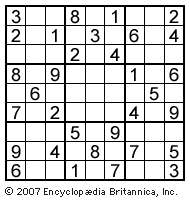

In [84]:
sudoku_matrix = np.array([[3,0,0,8,0,1,0,0,2], [2,0,1,0,3,0,6,0,4], [0,0,0,2,0,4,0,0,0],
                          [8,0,9,0,0,0,1,0,6], [0,6,0,0,0,0,0,5,0], [7,0,2,0,0,0,4,0,9],
                          [0,0,0,5,0,9,0,0,0], [9,0,4,0,8,0,7,0,5], [6,0,0,1,0,7,0,0,3]])
sudoku_matrix

array([[3, 0, 0, 8, 0, 1, 0, 0, 2],
       [2, 0, 1, 0, 3, 0, 6, 0, 4],
       [0, 0, 0, 2, 0, 4, 0, 0, 0],
       [8, 0, 9, 0, 0, 0, 1, 0, 6],
       [0, 6, 0, 0, 0, 0, 0, 5, 0],
       [7, 0, 2, 0, 0, 0, 4, 0, 9],
       [0, 0, 0, 5, 0, 9, 0, 0, 0],
       [9, 0, 4, 0, 8, 0, 7, 0, 5],
       [6, 0, 0, 1, 0, 7, 0, 0, 3]])

In [171]:
# details of the sudoku matrix
print("dimensions  ", sudoku_matrix.ndim)  # rows and columns 
print("shape  ", sudoku_matrix.shape)
print("size  ", sudoku_matrix.size)

dimensions   2
shape   (9, 9)
size   81


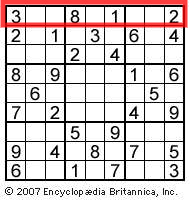

In [92]:
sudoku_matrix[0, : ] # 0th row & all columns

array([3, 0, 0, 8, 0, 1, 0, 0, 2])

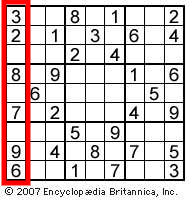

In [93]:
sudoku_matrix[ :, 0] # all rows and 0th column only

array([3, 2, 0, 8, 0, 7, 0, 9, 6])

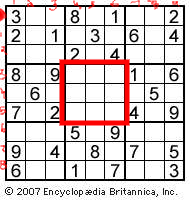

In [103]:
mid_matrix = sudoku_matrix[3:6, 3:6]
mid_matrix

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [105]:
# array slices are the views rather than the copies of the data in the matrix
mid_matrix[0,0]

0

In [106]:
mid_matrix[0, 0] = 20

In [107]:
mid_matrix

array([[20,  0,  0],
       [ 0,  0,  0],
       [ 0,  0,  0]])

In [108]:
sudoku_matrix

array([[ 3,  0,  0,  8,  0,  1,  0,  0,  2],
       [ 2,  0,  1,  0,  3,  0,  6,  0,  4],
       [ 0,  0,  0,  2,  0,  4,  0,  0,  0],
       [ 8,  0,  9, 20,  0,  0,  1,  0,  6],
       [ 0,  6,  0,  0,  0,  0,  0,  5,  0],
       [ 7,  0,  2,  0,  0,  0,  4,  0,  9],
       [ 0,  0,  0,  5,  0,  9,  0,  0,  0],
       [ 9,  0,  4,  0,  8,  0,  7,  0,  5],
       [ 6,  0,  0,  1,  0,  7,  0,  0,  3]])

In [112]:
sudoku_matrix[3,3] = 0
sudoku_matrix

array([[3, 0, 0, 8, 0, 1, 0, 0, 2],
       [2, 0, 1, 0, 3, 0, 6, 0, 4],
       [0, 0, 0, 2, 0, 4, 0, 0, 0],
       [8, 0, 9, 0, 0, 0, 1, 0, 6],
       [0, 6, 0, 0, 0, 0, 0, 5, 0],
       [7, 0, 2, 0, 0, 0, 4, 0, 9],
       [0, 0, 0, 5, 0, 9, 0, 0, 0],
       [9, 0, 4, 0, 8, 0, 7, 0, 5],
       [6, 0, 0, 1, 0, 7, 0, 0, 3]])

In [113]:
mid_matrix_copy = sudoku_matrix[3:6, 3:6].copy()

In [114]:
mid_matrix_copy[0,0] = 20
mid_matrix_copy

array([[20,  0,  0],
       [ 0,  0,  0],
       [ 0,  0,  0]])

In [115]:
sudoku_matrix

array([[3, 0, 0, 8, 0, 1, 0, 0, 2],
       [2, 0, 1, 0, 3, 0, 6, 0, 4],
       [0, 0, 0, 2, 0, 4, 0, 0, 0],
       [8, 0, 9, 0, 0, 0, 1, 0, 6],
       [0, 6, 0, 0, 0, 0, 0, 5, 0],
       [7, 0, 2, 0, 0, 0, 4, 0, 9],
       [0, 0, 0, 5, 0, 9, 0, 0, 0],
       [9, 0, 4, 0, 8, 0, 7, 0, 5],
       [6, 0, 0, 1, 0, 7, 0, 0, 3]])

In [118]:
# we can reshape easily using the reshape functionality
elements = np.array([3,0,0,8,0,1,0,0,2,2,0,1,0,3,0,6,0,4, 0,0,0,2,0,4,0,0,0,8,0,9,0,0,0,1,0,6, 0,6,0,0,0,0,0,5,0, 7,0,2,0,0,0,4,0,9,0,0,0,5,0,9,0,0,0, 9,0,4,0,8,0,7,0,5, 6,0,0,1,0,7,0,0,3])
elements.ndim, elements.shape

(1, (81,))

In [119]:
elements.reshape((9,9)) # returns  a view

array([[3, 0, 0, 8, 0, 1, 0, 0, 2],
       [2, 0, 1, 0, 3, 0, 6, 0, 4],
       [0, 0, 0, 2, 0, 4, 0, 0, 0],
       [8, 0, 9, 0, 0, 0, 1, 0, 6],
       [0, 6, 0, 0, 0, 0, 0, 5, 0],
       [7, 0, 2, 0, 0, 0, 4, 0, 9],
       [0, 0, 0, 5, 0, 9, 0, 0, 0],
       [9, 0, 4, 0, 8, 0, 7, 0, 5],
       [6, 0, 0, 1, 0, 7, 0, 0, 3]])

In [121]:
elem_view =  elements.reshape((9,9))
elem_view[0,0] = 200
elements

array([200,   0,   0,   8,   0,   1,   0,   0,   2,   2,   0,   1,   0,
         3,   0,   6,   0,   4,   0,   0,   0,   2,   0,   4,   0,   0,
         0,   8,   0,   9,   0,   0,   0,   1,   0,   6,   0,   6,   0,
         0,   0,   0,   0,   5,   0,   7,   0,   2,   0,   0,   0,   4,
         0,   9,   0,   0,   0,   5,   0,   9,   0,   0,   0,   9,   0,
         4,   0,   8,   0,   7,   0,   5,   6,   0,   0,   1,   0,   7,
         0,   0,   3])

In [122]:
# concatination
a = np.array([1,2,3,4,5,6])
b = np.array([7,8,9,10,11,12])
np.concatenate([a,b])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [125]:
square = np.zeros((4,4))
square

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [137]:
row = np.array([1,2,3,4])

In [138]:
np.concatenate([square, [row]])

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 2., 3., 4.]])

In [144]:
col = row.reshape((4,1))
col

array([[1],
       [2],
       [3],
       [4]])

In [145]:
np.concatenate([square, col], axis=1)

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 2.],
       [0., 0., 0., 0., 3.],
       [0., 0., 0., 0., 4.]])

In [147]:
np.vstack([square, row])

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 2., 3., 4.]])

In [149]:
np.hstack([square, col])

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 2.],
       [0., 0., 0., 0., 3.],
       [0., 0., 0., 0., 4.]])

In [173]:
#np.dstack for the third axis
sudoku_matrix

array([[3, 0, 0, 8, 0, 1, 0, 0, 2],
       [2, 0, 1, 0, 3, 0, 6, 0, 4],
       [0, 0, 0, 2, 0, 4, 0, 0, 0],
       [8, 0, 9, 0, 0, 0, 1, 0, 6],
       [0, 6, 0, 0, 0, 0, 0, 5, 0],
       [7, 0, 2, 0, 0, 0, 4, 0, 9],
       [0, 0, 0, 5, 0, 9, 0, 0, 0],
       [9, 0, 4, 0, 8, 0, 7, 0, 5],
       [6, 0, 0, 1, 0, 7, 0, 0, 3]])

In [153]:
np.hsplit(sudoku_matrix, [4])

[array([[3, 0, 0, 8],
        [2, 0, 1, 0],
        [0, 0, 0, 2],
        [8, 0, 9, 0],
        [0, 6, 0, 0],
        [7, 0, 2, 0],
        [0, 0, 0, 5],
        [9, 0, 4, 0],
        [6, 0, 0, 1]]),
 array([[0, 1, 0, 0, 2],
        [3, 0, 6, 0, 4],
        [0, 4, 0, 0, 0],
        [0, 0, 1, 0, 6],
        [0, 0, 0, 5, 0],
        [0, 0, 4, 0, 9],
        [0, 9, 0, 0, 0],
        [8, 0, 7, 0, 5],
        [0, 7, 0, 0, 3]])]

In [157]:
np.vsplit(sudoku_matrix, [4])

[array([[3, 0, 0, 8, 0, 1, 0, 0, 2],
        [2, 0, 1, 0, 3, 0, 6, 0, 4],
        [0, 0, 0, 2, 0, 4, 0, 0, 0],
        [8, 0, 9, 0, 0, 0, 1, 0, 6]]),
 array([[0, 6, 0, 0, 0, 0, 0, 5, 0],
        [7, 0, 2, 0, 0, 0, 4, 0, 9],
        [0, 0, 0, 5, 0, 9, 0, 0, 0],
        [9, 0, 4, 0, 8, 0, 7, 0, 5],
        [6, 0, 0, 1, 0, 7, 0, 0, 3]])]

#### 5. Computation with numpy arrays